#Описание работы №1:


Передо мной стояла задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.


In [5]:
import psycopg2
import numpy as np
import pandas as pd

connect = psycopg2.connect(**{'host': 'dsstudents.skillbox.ru', 
                           'port': 5432, 
                           'dbname': 'human_resources', 
                           'user': 'readonly', 
                           'password': '6hajV34RTQfmxhS'})



---------------------------------------------------------------------------------------------------------------------------------------------
#Предоставленные данные
---------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
pd.read_sql_query('select * from hr_dataset', connect)


,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,...,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,...,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,...,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,...,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,...,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,306,"Navathe, Kurt",1009919960,0,0,1,1,3,3,48,...,2017-02-10,289,None,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
306,307,"Wang, Charlie",1009919970,0,0,1,1,3,3,36,...,2017-02-15,284,None,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
307,308,"Smith, Jason",1009919980,0,0,1,1,3,3,34,...,2017-02-15,284,None,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets
308,309,"Westinghouse, Matthew",1009919990,1,1,1,1,3,3,30,...,2017-04-20,220,None,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets


In [7]:
pd.read_sql_query('select * from production_staff', connect)


,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0
3,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
4,5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
252,253,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
253,254,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
254,255,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN


In [8]:
pd.read_sql_query('select * from recruiting_costs', connect)


,id,Employment Source,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1,Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
1,2,Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
2,3,Company Intranet - Partner,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
4,5,Employee Referral,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,Glassdoor,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,Information Session,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,Internet Search,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,MBTA ads,640,640,640,640,640,640,640,1300,1300,1300,1300,1300,10980
9,10,Monster.com,500,500,500,440,500,500,440,500,440,440,500,500,5760


In [9]:
pd.read_sql_query('select * from salary_grid', connect)

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45
5,6,Network Engineer,50845,66850,88279,24.44,32.14,42.44
6,7,Sr. Network Engineer,79428,99458,120451,38.19,47.82,57.91
7,8,Database Administrator,50569,68306,93312,24.31,32.84,44.86
8,9,Sr. DBA,92863,116007,139170,44.65,55.77,66.91
9,10,Production Technician I,30000,40000,50000,14.42,19.23,24.04


---------------------------------------------------------------------------------------------------------------------------------------------
#Поиск зависимостей
---------------------------------------------------------------------------------------------------------------------------------------------

# Есть зависимость между возрастом и кол-вом допущенных ошибок. Чем старше сотрудник, тем больше ошибок он допускает

In [10]:
pd.read_sql('''

    select AVG("Daily Error Rate"), CASE

        WHEN age<=30 THEN '[25; 30]'

        WHEN age<=50 THEN '(30; 50]'

        ELSE '(50; 70]'

    END AS age_group from (

     select a.age, b."Daily Error Rate"

    from hr_dataset a     left join production_staff b on

         (a."Employee Name" = b."Employee Name") and (a."Date of Hire" = b."Date of Hire") and (a.position = b."Position")) as df

         group by age_group''', connect).sort_values('avg')

,avg,age_group
1,0.826087,[25; 30]
2,0.899371,(30; 50]
0,1.086957,(50; 70]


# Есть зависимость между возрастом, зарплатой и кол-вом рабочих дней. Сотрудники среднего возраста получают меньше зарплаты и реже меняют место работы

In [11]:
pd.read_sql('''
     select AVG("Pay Rate") as "Pay Rate",AVG("Days Employed") as "Days Employed",CASE

        WHEN age<=30 THEN '[25; 30]'

        WHEN age<=50 THEN '(30; 50]'

        ELSE '(50; 70]'

    END AS age_group from hr_dataset as df group by age_group''', connect)

,Pay Rate,Days Employed,age_group
0,32.951429,1222.800000,(50; 70]
1,34.217059,1283.764706,[25; 30]
2,30.356786,1310.334821,(30; 50]


# Есть зависимость между расой и кол-вом допущенных ошибок. Меньше всего ошибок совершают "American Indian or Alaska Native"

In [12]:
pd.read_sql('''

    select AVG("Daily Error Rate") as "Daily Error Rate"  ,racedesc	
      from (

     select a.racedesc, b."Daily Error Rate"

    from hr_dataset a     left join production_staff b on

         (a."Employee Name" = b."Employee Name") and (a."Date of Hire" = b."Date of Hire") and (a.position = b."Position")) as df

         group by racedesc''', connect).sort_values('Daily Error Rate')

,Daily Error Rate,racedesc
0,0.333333,American Indian or Alaska Native
3,0.681818,Asian
4,0.845588,White
2,1.000000,Two or more races
1,1.333333,Hispanic
5,1.354839,Black or African American


# Есть зависимость между гражданством и кол-вом допущенных ошибок. Меньше всего ошибок совершают граждане США

In [13]:
pd.read_sql('''

    select AVG("Daily Error Rate") as "Daily Error Rate"  ,citizendesc
      from (

     select a.citizendesc, b."Daily Error Rate"

    from hr_dataset a     left join production_staff b on

         (a."Employee Name" = b."Employee Name") and (a."Date of Hire" = b."Date of Hire") and (a.position = b."Position")) as df

         group by citizendesc''', connect).sort_values('Daily Error Rate')

,Daily Error Rate,citizendesc
2,0.887179,US Citizen
0,1.285714,Eligible NonCitizen
1,1.666667,Non-Citizen


# Есть зависимость между полом и кол-вом допущенных ошибок. Меньше всего ошибок совершают мужчины

In [14]:
pd.read_sql('''

    select AVG("Daily Error Rate") as "Daily Error Rate"  ,sex	
      from (

     select a.sex	, b."Daily Error Rate"

    from hr_dataset a     left join production_staff b on

         (a."Employee Name" = b."Employee Name") and (a."Date of Hire" = b."Date of Hire") and (a.position = b."Position")) as df

         group by sex	''', connect).sort_values('Daily Error Rate')

,Daily Error Rate,sex
1,0.696203,Male
0,1.047619,Female


# Есть зависимость между "marriedid" и кол-вом допущенных ошибок. Меньше всего ошибок совершают не женатые люди.

In [15]:
pd.read_sql('''

    select AVG("Daily Error Rate") as "Daily Error Rate"  ,marriedid		
      from (

     select a.marriedid		, b."Daily Error Rate"

    from hr_dataset a     left join production_staff b on

         (a."Employee Name" = b."Employee Name") and (a."Date of Hire" = b."Date of Hire") and (a.position = b."Position")) as df

         group by marriedid	''', connect).sort_values('Daily Error Rate')

,Daily Error Rate,marriedid
0,0.880952,0
1,0.962025,1


# Согласно гипотезам которые были сделаны выше, я пришел к выводу, что сотрудников в возростной группе [30,50] стоит нанимать.
# Так как они допускают среднее кол-во ошибок, но при этом они получают в среднем меньше зарплату и реже меняют место работы.
# Также желательно нанимать граждан США,так как они допускают меньше ошибок.
# Также есть зависимость связанная с расой. Cотрудники принадлежащие к расе "American Indian or Alaska Native" допускают меньше ошибок и при наеме на работу стоит учитывать этот фактор.
# На работу в приоритете стоит нанимать мужчин из-за того, что они совершают меньше ошибок.
# Также при наеме на работу стоит учитывать фактор, что не женатые люди совершают меньше ошибок.

---------------------------------------------------------------------------------------------------------------------------------------------
#Передо мной стояла задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
---------------------------------------------------------------------------------------------------------------------------------------------

#Ссылка на данные: https://disk.yandex.ru/d/gElR1ec8iA3Gcw

In [16]:
#1
#import pandas as pd
#from datetime import datetime, timedelta
#import requests
#print('Start')
#def getjson(url):
#    response = requests.get(url)
#    response = response.json()
#    return response
#
#vk_token = 'dc18b4a1fc99f87cfc0f1dbd9a8ba37b29fc062f24b8179f9c6d4c696f88c7efc15cf030913b0676bfd28'
#
#data = pd.DataFrame()
#url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&offset=0&count=1&v=5.92'
#count = getjson(url)['response']['count']
#for offset in range(count):
#    try:
#        url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&offset='+str(offset)+'&count=1&v=5.92'
#        response = getjson(url)['response']['items']
#        data = data.append(pd.DataFrame(response))
#        print(offset)
#    except KeyError:
#        try:
#            url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&offset='+str(offset)+'&count=1&v=5.92'
#            response = getjson(url)['response']['items']
#            data = data.append(pd.DataFrame(response))
#            print(offset)
#        except KeyError:
#            try:
#                url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&offset='+str(offset)+'&count=1&v=5.92'
#               response = getjson(url)['response']['items']
#                data = data.append(pd.DataFrame(response))
#                print(offset)
#            except KeyError:
#                print(offset,'ошибка')
#data

In [17]:
from datetime import datetime, timedelta
import ast
import matplotlib.pyplot as plt

data = pd.read_csv('data_3.csv',sep=';',encoding='utf-16')
data['date'] = data['date'].map(lambda x:(datetime.fromtimestamp(x) - timedelta(hours=0)).strftime('%Y-%m'))
data['comments'] = data['comments'].map(lambda x: ast.literal_eval(x)['count'])
data['likes'] = data['likes'].map(lambda x: ast.literal_eval(x)['count'])
data['reposts'] = data['reposts'].map(lambda x: ast.literal_eval(x)['count'])
data['views'] = data['views'].fillna("{'count': 0}")
data['views'] = data['views'].map(lambda x: ast.literal_eval(x)['count'])
data

,Unnamed: 0,id,from_id,owner_id,date,marked_as_ads,post_type,text,is_pinned,attachments,post_source,comments,likes,reposts,views,is_favorite,hash,copy_history,signer_id
0,0,215343,-66669811,-66669811,2021-11,0,post,"Нет, это не шутка! Попробовать 34 курса и инте...",1.0,"[{'type': 'photo', 'photo': {'album_id': -7, '...",{'type': 'vk'},220,729,1182,111234,False,1Dc2oRE5BG9QnHb8xBu6zeRYeCN-,NaN,NaN
1,0,234514,-66669811,-66669811,2022-02,0,post,"Когда вы готовитесь к собеседованию, мало отре...",NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",{'type': 'api'},0,113,108,23773,False,1D84ncJluOA-gtCLF42WLYOlG9PK,NaN,NaN
2,0,234464,-66669811,-66669811,2022-02,0,post,"Единственная веская причина, почему вам не сто...",NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",{'type': 'api'},0,20,13,11687,False,-OxDRQuM4SqWUfXV5rNWPQTYITH9,NaN,NaN
3,0,234463,-66669811,-66669811,2022-02,0,post,"Так, посмотрим, чему будем учиться на этой нед...",NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",{'type': 'api'},6,15,10,13839,False,35n5Wf--SWysP5DKqykNiPV8ZjTX,NaN,NaN
4,0,234382,-66669811,-66669811,2022-02,0,post,"Написали коллегам, что «устали жрать начальник...",NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",{'type': 'api'},18,19,14,9250,False,vvnBBzpIKOEorbUXh5-DRzPf2vzQ,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,0,19003,-66669811,-66669811,2016-04,0,post,#internetmarketing #business #skillbox\n\n15 с...,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",{'type': 'vk'},0,4,0,0,False,H_HFyUffF9gUwuzRdJ1g1sNHX_Hg,NaN,NaN
4024,0,18999,-66669811,-66669811,2016-04,0,post,#internetmarketing #business #skillbox\n\nБлес...,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",{'type': 'vk'},0,1,0,0,False,MOgz-Gr_Ly51ukdMwQypseDfAlQB,NaN,NaN
4025,0,18998,-66669811,-66669811,2016-04,0,post,#movie #internetmarketing #business #skillbox ...,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",{'type': 'vk'},0,3,0,0,False,IzPRCJvj8iStuy1V5nmQa6CIoHwW,NaN,NaN
4026,0,18994,-66669811,-66669811,2016-04,0,post,#studio #business #skillbox \n\n4 вида рекламн...,NaN,"[{'type': 'photo', 'photo': {'album_id': -7, '...",{'type': 'vk'},0,6,0,0,False,9F1Rb8EoR08dXhqyY7cN_e4wZ1nr,NaN,NaN


#График кол-во коментариев в каждом месяце всех годов

No handles with labels found to put in legend.


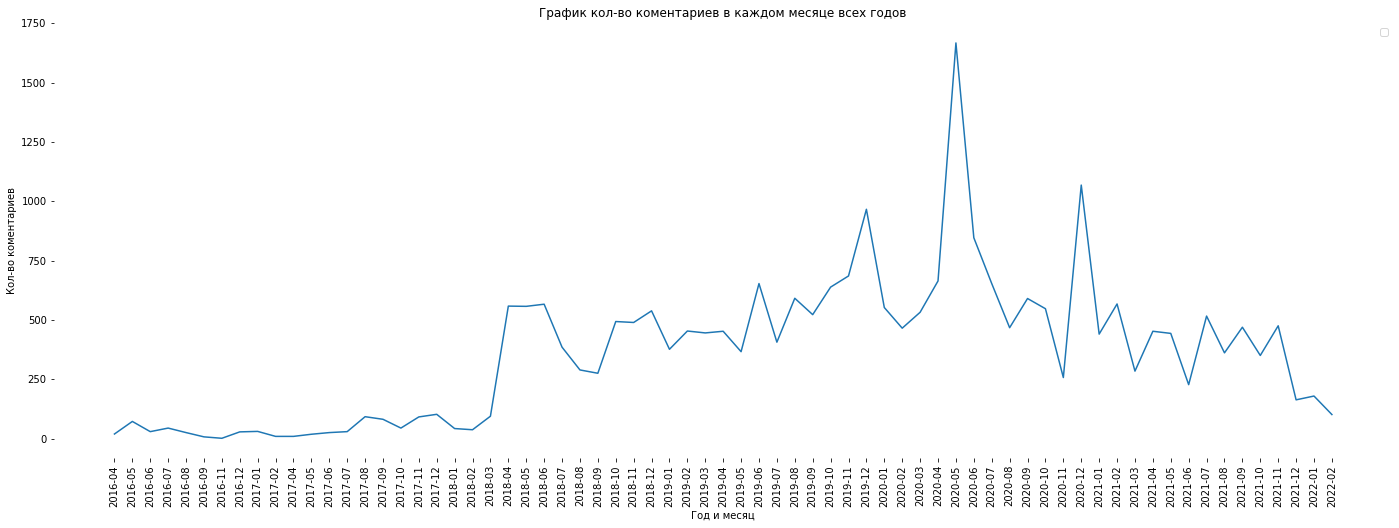

In [18]:
fix, ax = plt.subplots(figsize = (24,8))
data_3 = data[['date','comments']].groupby('date').sum()
ax.plot(data_3)
plt.xticks(rotation = 90)
ax.set_title('График кол-во коментариев в каждом месяце всех годов')
ax.set_xlabel('Год и месяц')
ax.set_ylabel('Кол-во коментариев')
plt.legend()
plt.box(on=None)
plt.show()

#График кол-во лайков в каждом месяце всех годов

No handles with labels found to put in legend.


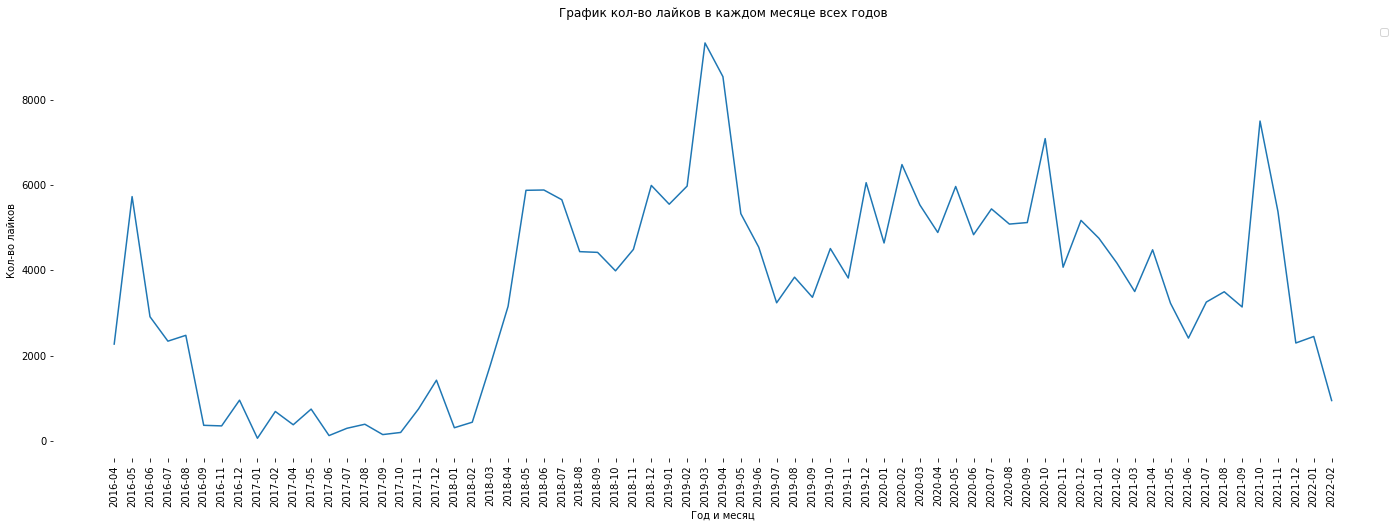

In [19]:
fix, ax = plt.subplots(figsize = (24,8))
data_3 = data[['date','likes']].groupby('date').sum()
ax.plot(data_3)
plt.xticks(rotation = 90)
ax.set_title('График кол-во лайков в каждом месяце всех годов')
ax.set_xlabel('Год и месяц')
ax.set_ylabel('Кол-во лайков')
plt.legend()
plt.box(on=None)
plt.show()

#График кол-во репостов в каждом месяце всех годов

No handles with labels found to put in legend.


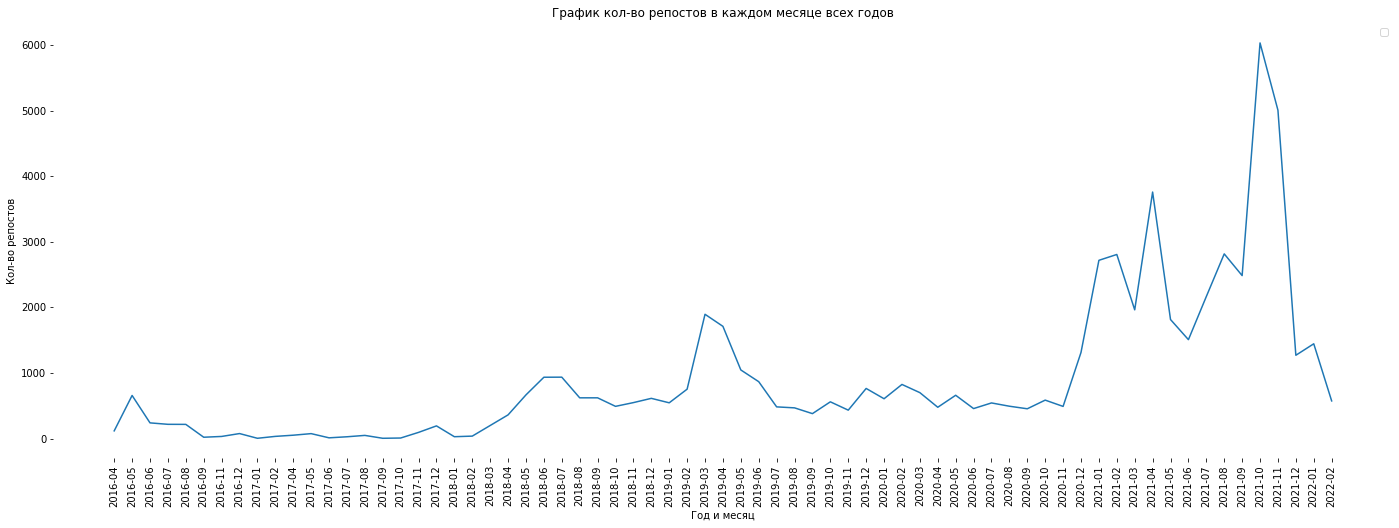

In [20]:
fix, ax = plt.subplots(figsize = (24,8))
data_3 = data[['date','reposts']].groupby('date').sum()
ax.plot(data_3)
plt.xticks(rotation = 90)
ax.set_title('График кол-во репостов в каждом месяце всех годов')
ax.set_xlabel('Год и месяц')
ax.set_ylabel('Кол-во репостов')
plt.legend()
plt.box(on=None)
plt.show()

#График кол-во просмотров в каждом месяце всех годов

No handles with labels found to put in legend.


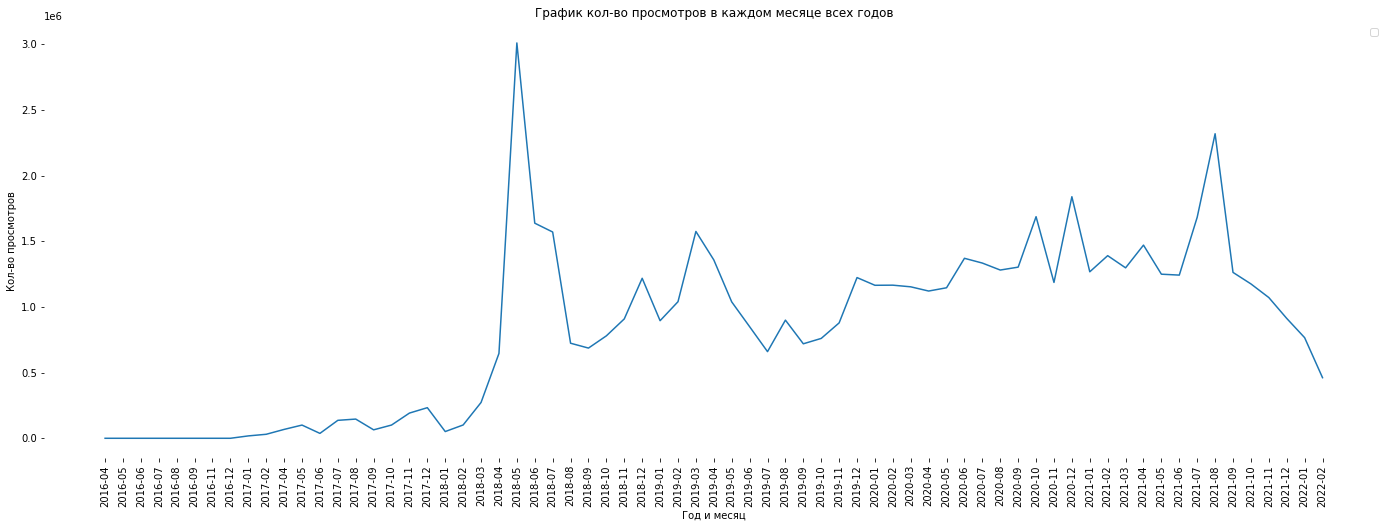

In [21]:
fix, ax = plt.subplots(figsize = (24,8))
data_3 = data[['date','views']].groupby('date').sum()
ax.plot(data_3)
plt.xticks(rotation = 90)
ax.set_title('График кол-во просмотров в каждом месяце всех годов')
ax.set_xlabel('Год и месяц')
ax.set_ylabel('Кол-во просмотров')
plt.legend()
plt.box(on=None)
plt.show()

#График кол-во постов в каждом месяце всех годов

No handles with labels found to put in legend.


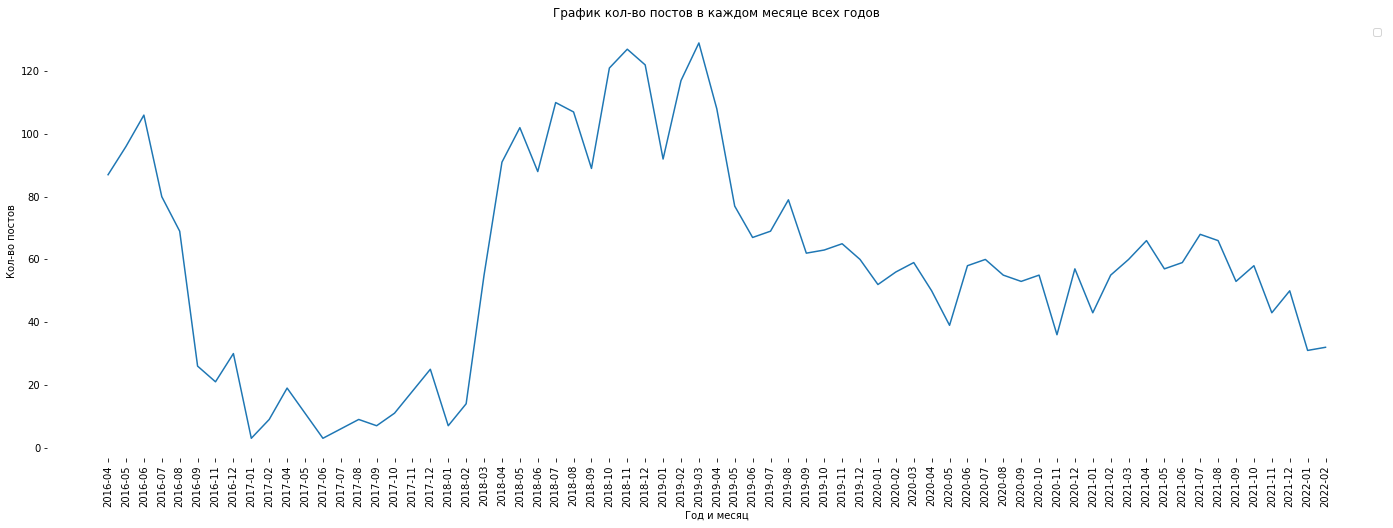

In [22]:
fix, ax = plt.subplots(figsize = (24,8))
data_3 = data[['date','views']].groupby('date').count()
ax.plot(data_3)
plt.xticks(rotation = 90)
ax.set_title('График кол-во постов в каждом месяце всех годов')
ax.set_xlabel('Год и месяц')
ax.set_ylabel('Кол-во постов')
plt.legend()
plt.box(on=None)
plt.show()

# С самого начала создания паблика создовалось много постов,но при этом было мало просмотров и репостов, но также странно, что в это время было достаточно много лайков.
# C сентября 2016 года по октябрь посты вообще отсутсвоют и с ноября 2016 года по февраль 2018 постов очень мало по сравнению с другими месяцами,a также в марте 2017 записей,тоже не наблюдаеться.
# И с февраля 2018 начинаеться активная публикация постов, то есть начался активный пиар сайта. Также вероятно примерно в марта 2018 года началась активная реклама на других сайтах так-как с этого периода наблюдаеться
# Самый большой пик просмотров. C ноября 2020 видно большой прирост в репостах, вероятно с этого момента паблик начал устраивать конкурсы на репосты. Самые обсуждаемые темы проходили с октября 2019 по январь 2021.

---------------------------------------------------------------------------------------------------------------------------------------------
#График ср кол-во комментов в каждом месяце

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


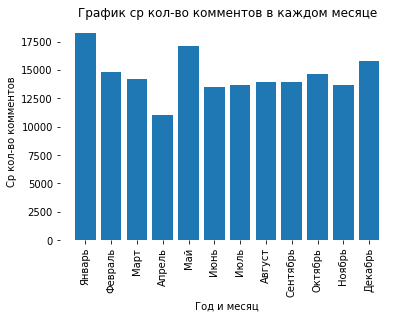

In [33]:
data_2 = data[['date','comments','likes','reposts','views']]
data_2['date'] = data_2['date'].map(lambda x: x[5:])
def dataa(x):
  if x == '01':
    return 'Январь'
  elif x == '02':
    return 'Февраль'
  elif x == '03':
    return 'Март'
  elif x == '04':
    return 'Апрель'
  elif x == '05':
    return 'Май'
  elif x == '06':
    return 'Июнь'
  elif x == '07':
    return 'Июль'
  elif x == '08':
    return 'Август'
  elif x == '09':
    return 'Сентябрь'
  elif x == '10':
    return 'Октябрь'
  elif x == '11':
    return 'Ноябрь'
  elif x == '12':
    return 'Декабрь'
data_1 = data_2[['date','views']].groupby('date').mean().reset_index()
data_1['date'] = data_1['date'].map(lambda x: dataa(x))
plt.bar(data_1['date'], data_1['views'])
plt.title('График ср кол-во комментов в каждом месяце')
plt.xlabel('Год и месяц')
plt.ylabel('Ср кол-во комментов')
plt.xticks(rotation=90)
plt.box(on=None)
plt.show()

#График ср кол-во просмотров в каждом месяце

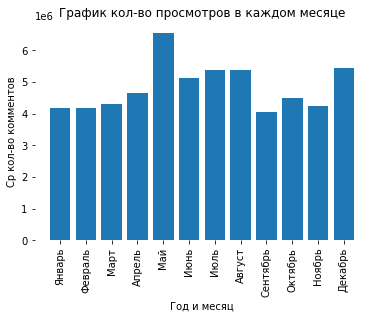

In [37]:
data_1 = data_2[['date','views']].groupby('date').sum().reset_index()
data_1['date'] = data_1['date'].map(lambda x: dataa(x))
plt.bar(data_1['date'], data_1['views'])
plt.title('График кол-во просмотров в каждом месяце')
plt.xlabel('Год и месяц')
plt.ylabel('Ср кол-во комментов')
plt.xticks(rotation=90)
plt.box(on=None)
plt.show()

#График ср кол-во лайков в каждом месяце

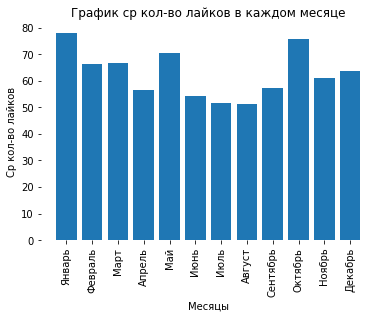

In [25]:
data_1 = data_2[['date','likes']].groupby('date').mean().reset_index()
data_1['date'] = data_1['date'].map(lambda x: dataa(x))
plt.bar(data_1['date'], data_1['likes'])
plt.title('График ср кол-во лайков в каждом месяце')
plt.xlabel('Месяцы')
plt.ylabel('Ср кол-во лайков')
plt.xticks(rotation=90)
plt.box(on=None)
plt.show()

#График кол-во лайков в каждом месяце

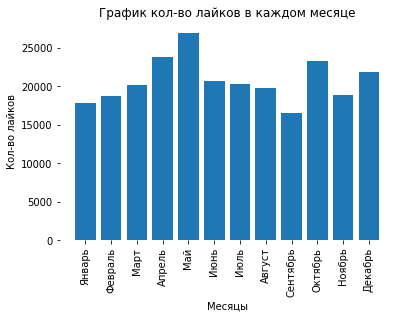

In [26]:
data_1 = data_2[['date','likes']].groupby('date').sum().reset_index()
data_1['date'] = data_1['date'].map(lambda x: dataa(x))
plt.bar(data_1['date'], data_1['likes'])
plt.title('График кол-во лайков в каждом месяце')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во лайков')
plt.xticks(rotation=90)
plt.box(on=None)
plt.show()

#График ср кол-во репостов в каждом месяце

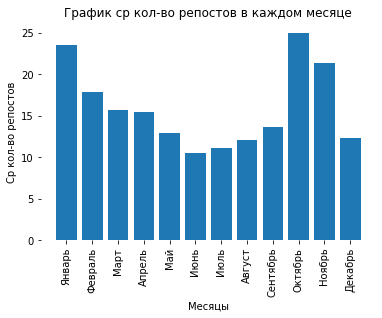

In [27]:
data_1 = data_2[['date','reposts']].groupby('date').mean().reset_index()
data_1['date'] = data_1['date'].map(lambda x: dataa(x))
plt.bar(data_1['date'], data_1['reposts'])
plt.title('График ср кол-во репостов в каждом месяце')
plt.xlabel('Месяцы')
plt.ylabel('Ср кол-во репостов')
plt.xticks(rotation=90)
plt.box(on=None)
plt.show()

#График кол-во просмотров в каждом месяце

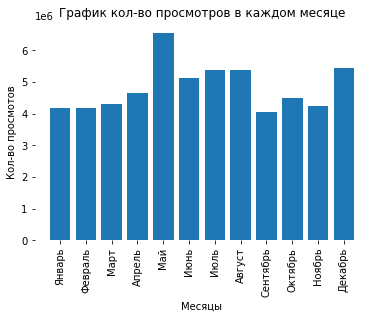

In [28]:
data_1 = data_2[['date','views']].groupby('date').sum().reset_index()
data_1['date'] = data_1['date'].map(lambda x: dataa(x))
plt.bar(data_1['date'], data_1['views'])
plt.title('График кол-во просмотров в каждом месяце')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во просмотов')
plt.xticks(rotation=90)
plt.box(on=None)
plt.show()

#График ср кол-во просмотов в каждом месяце

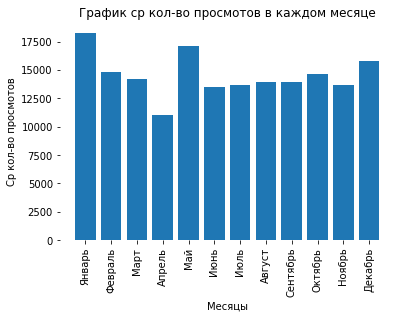

In [29]:
data_1 = data_2[['date','views']].groupby('date').mean().reset_index()
data_1['date'] = data_1['date'].map(lambda x: dataa(x))
plt.bar(data_1['date'], data_1['views'])
plt.title('График ср кол-во просмотов в каждом месяце')
plt.xlabel('Месяцы')
plt.ylabel('Ср кол-во просмотов')
plt.xticks(rotation=90)
plt.box(on=None)
plt.show()

#График кол-во постов в каждом месяце

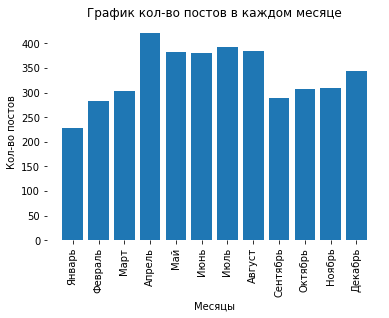

In [30]:
data_1 = data_2[['date','views']].groupby('date').count().reset_index()
data_1['date'] = data_1['date'].map(lambda x: dataa(x))
plt.bar(data_1['date'], data_1['views'])
plt.title('График кол-во постов в каждом месяце')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во постов')
plt.xticks(rotation=90)
plt.box(on=None)
plt.show()

# С апреля по август самые большое кол-во выкладываемых постов эти месяцы +- одинаковы, но среди них всех выделяеться май в этот месяц больше всего просмотров, лайков и комментариев. Самое малое кол-во
# постов в январе, но из-за этого в нем самые большие ср показатили по просмотров и лайков. В января, октябре и ноябре самые большие ср показатели репостов и вероятнее всего в эти мясцы чаще проводиться
# конкурсы, ведь они не отличаються самыми большими показателми по кол-ву постов. В октябре и декабре затрагиваються более интересные темы так как в эти месяцы процентно больше лайков по сравнению с кол-вом постов.